# Example of analysing GHCN data from Romania

[Global historcal climate network](http://www.ncdc.noaa.gov/ghcnm/) weather station data from Romania.

In [1]:
# Load some libraries
import pandas as pd
import os
import numpy as np
%matplotlib inline

In [7]:
# Read a station data file with Pandas
test_data = pd.read_csv("Data/station_data/BUM00015502_VIDIN_BU_.csv")
test_data.head()

,DATE,PRCP,TAVG
0,19860301,-9999.0,-5.7
1,19860303,-9999.0,-0.1
2,19860304,0.5,0.9
3,19911129,-9999.0,5.3
4,19911201,-9999.0,5.1


Looks good, but the Dates should be an index, not a column, and they should also be a date object, not a simple integer (we get much more functionality that way).

In [8]:
# Make a list of datetime values out of the integer dates using a list comprehension technique
dates = []
for date in test_data['DATE']:
    dates.append(pd.datetime.strptime(str(date),"%Y%m%d"))
# The above could have been done more effectivley using list comprehension

# Next set the new list as an index, and remove the old column from the dataset
test_data.index = dates
test_data = test_data.drop('DATE', axis=1)

test_data.head()

,PRCP,TAVG
1986-03-01,-9999.0,-5.7
1986-03-03,-9999.0,-0.1
1986-03-04,0.5,0.9
1991-11-29,-9999.0,5.3
1991-12-01,-9999.0,5.1


Great! We can plot a simple preview of the data to make sure it looks good.

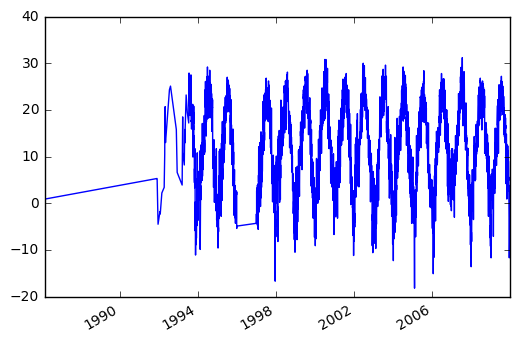

In [9]:
test_data['TAVG'].plot()

The preview plot is messy, but as a quick-check, it seems like everything is fine.

So, reading a single file is easy, and straightforward. But we want to do some exploratory analysis on multiple station measurements. For this we will need to read all the station data together into a consistent data object. 

In [13]:
# Make a small tools (functions) to help with the work

def station_name(fname):
    """Return the station ID from a path/filename.csv string"""
    tmp = fname.split('/')[-1]
    return tmp.split('_')[0]

In [17]:
# If we were on a Mac or Linux system, we could get the file list via a bash command
flist = !ls Data/station_data/*.csv

In [19]:
# But it will be better (cross-platform) to get it with a python library instead

mypath = 'Data/station_data/'          # Set path to data
for item in os.listdir(mypath):        # Find all files in that path and loop over them
    if '.csv' in item:                 # If the file is a csv type do something...
        fname = ''.join([mypath,item])
        station = station_name(fname)
        print('Reading data from station', station)
        tmp = pd.read_csv(fname)
        dates = [pd.datetime.strptime(str(date),"%Y%m%d") for date in tmp['DATE']]
        tmp.index = dates
        tmp = tmp.drop(['DATE','PRCP'], axis=1) # get rid of date and precipitation columns
        tmp.columns = [station]     # Re-name TAVG to be the station name
        break

Reading data from station BUM00015502


In [20]:
# Preview the data object
tmp.head()

,BUM00015502
1986-03-01,-5.7
1986-03-03,-0.1
1986-03-04,0.9
1991-11-29,5.3
1991-12-01,5.1


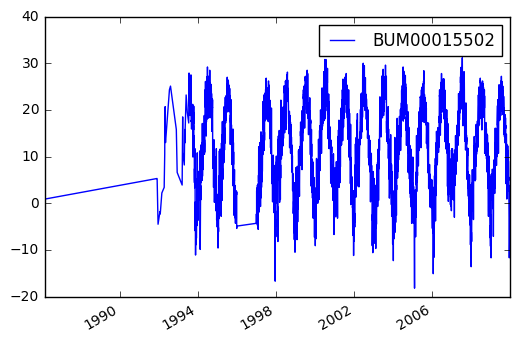

In [21]:
# Looks good, how does it look when we try and test plot?
tmp.plot()